# Hand Writtten Digit Recognition

# importing the required libraries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import cv2 as cv
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.layers import BatchNormalization


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Preprocessing the Data

In [3]:
num_classes = 10
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train.shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train.shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Creating the model

In [9]:
batch_size = 128
num_classes = 10
epochs = 2
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3),activation = 'relu', input_shape = input_shape))
model.add(BatchNormalization()) 
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(256,activation = 'relu',kernel_regularizer=l2(0.001)))
model.add(Dense(256,activation = 'relu',kernel_regularizer=l2(0.001)))


model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))   
model.add(Dropout(0.5)) 
model.add(Dense(num_classes ,activation = 'softmax'))         
from keras.optimizers import Adam

# Change optimizer to Adam with a custom learning rate
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


/Users/shivakumargoudmucharla/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Training the model

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,         # Rotate images by a max of 10 degrees
    zoom_range=0.1,            # Random zoom
    width_shift_range=0.1,     # Randomly shift images horizontally
    height_shift_range=0.1,    # Randomly shift images vertically
    horizontal_flip=False)     # Set to True if using mirrored images

# Fit the generator on training data
datagen.fit(x_train)

# Use the generator to train the model
# Corrected steps_per_epoch by converting to integer
hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                 validation_data=(x_test, y_test),
                 steps_per_epoch=int(len(x_train) / batch_size),  # Convert to int
                 epochs=epochs, verbose=1)


Epoch 1/2
468/468 ━━━━━━━━━━━━━━━━━━━━ 72s 153ms/step - accuracy: 0.7492 - loss: 1.3491 - val_accuracy: 0.9791 - val_loss: 0.4064
Epoch 2/2
  1/468 ━━━━━━━━━━━━━━━━━━━━ 1:30 194ms/step - accuracy: 0.9688 - loss: 0.4002

2024-10-05 14:25:47.660409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9688 - loss: 0.2005 - val_accuracy: 0.9806 - val_loss: 0.4025


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
---------
The Predicted output is: 7
------------


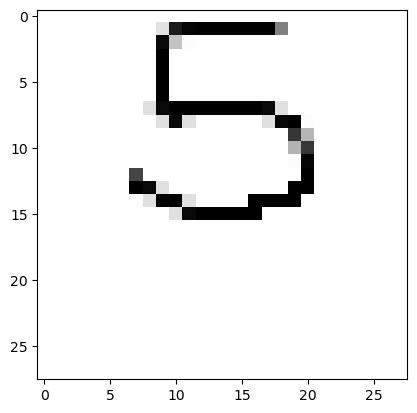

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
---------
The Predicted output is: 4
------------


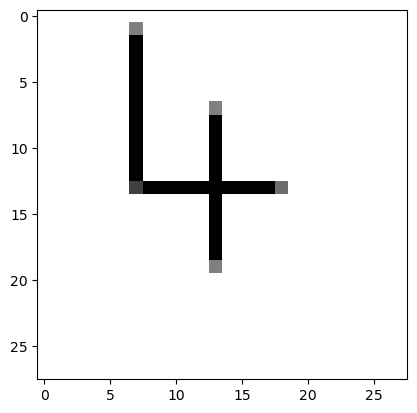

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
---------
The Predicted output is: 3
------------


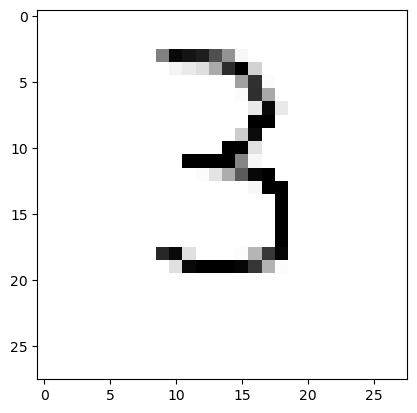

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
---------
The Predicted output is: 3
------------


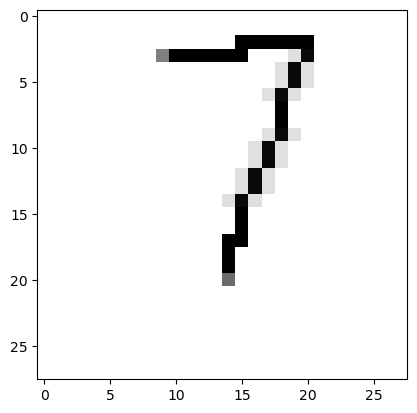

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
---------
The Predicted output is: 6
------------


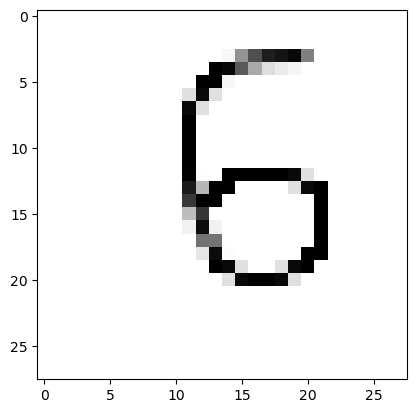

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

for x in range(1, 6):
    # Load the image in grayscale
    img = cv.imread(f'{x}.png', cv.IMREAD_GRAYSCALE)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Image {x}.png not found or could not be opened.")
        continue
    
    # Invert the image so that background is white and number is black
    img = np.invert(img)
    
    # Resize the image to match the input shape (28, 28) if needed
    img = cv.resize(img, (28, 28))
    
    # Reshape the image to include the batch dimension and the channel dimension
    img = img.reshape(1, 28, 28, 1)
    
    # Normalize the image (optional)
    img = img.astype('float32') / 255.0
    
    # Make the prediction using the model
    prediction = model.predict(img)
    
    print('---------')
    print("The Predicted output is:", np.argmax(prediction))
    print("------------")
    
    # Plot the image
    plt.imshow(img[0, :, :, 0], cmap=plt.cm.binary)
    plt.show()
